In [80]:
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [81]:
load_dotenv(find_dotenv())

True

In [82]:
project_root = os.environ.get("PROJECT_ROOT")
data_dir = os.environ.get("DATA_DIR")
dataset_fullpath = os.path.join(project_root, data_dir, "output")
dataset_fullpath

'/home/tdy245/ResearchProjects/Winter_2024/CMPT-828/A_Implementation/PaCo/data/output'

In [83]:
large_patches_df = pd.read_csv(os.path.join(dataset_fullpath, "large-patches.csv"))
small_patches_df = pd.read_csv(os.path.join(dataset_fullpath, "small-patches.csv")) 

# Implementation on the small_patches dataset

In [183]:
small_patches_df.keys()

Index(['dataset', 'tool', 'buggy', 'patch', 'label'], dtype='object')

In [187]:
small_patches_df['tool'].unique()

array(['ACS', 'Kali', 'SketchFix', 'Cardumen', 'TBar', 'jKali',
       'SequenceR', 'CapGen', 'Nopol', 'AVATAR', 'jGenProg', 'Nopol2015',
       'HDRepair', 'Nopol2017', 'FixMiner', 'Jaid', 'SimFix', 'kPAR',
       'Arja', 'RSRepair', 'SOFix', 'jMutRepair', 'GenProg', 'DynaMoth',
       'HDRepair.patch', 'ACS.patch', 'Nopol2015.patch', 'jGenProg.patch',
       'defects4j-developer'], dtype=object)

In [189]:
def dataset_info(dataset):
    print(f"Total number of patches:  {dataset.shape[0]}")
    print(f"Total number of unique bugs: {len(dataset['dataset'].unique())}")
    print(f"Total number of correct patches: {len(dataset.loc[dataset['label'] == 'correct'])}")
    print(f"Total number of overfitted patches: {len(dataset.loc[dataset['label'] == 'overfitting'])}")
    print(f"Tools used: {dataset['tool'].unique()}\nTotal number of tools: {len(dataset['tool'].unique())}")

In [190]:
dataset_info(small_patches_df)

Total number of patches:  1183
Total number of unique bugs: 356
Total number of correct patches: 535
Total number of overfitted patches: 648
Tools used: ['ACS' 'Kali' 'SketchFix' 'Cardumen' 'TBar' 'jKali' 'SequenceR' 'CapGen'
 'Nopol' 'AVATAR' 'jGenProg' 'Nopol2015' 'HDRepair' 'Nopol2017' 'FixMiner'
 'Jaid' 'SimFix' 'kPAR' 'Arja' 'RSRepair' 'SOFix' 'jMutRepair' 'GenProg'
 'DynaMoth' 'HDRepair.patch' 'ACS.patch' 'Nopol2015.patch'
 'jGenProg.patch' 'defects4j-developer']
Total number of tools: 29


In [196]:
small_df_ = pd.crosstab(small_patches_df["dataset"], small_patches_df["label"])

In [206]:
print(f"Has only incorrect patches: {len(small_df_.loc[small_df_['correct'] == 0])} ")
print(f"Has only correct patches: {len(small_df_.loc[small_df_['overfitting'] == 0])} ")
small_df_.head()

Has only incorrect patches: 2 
Has only correct patches: 190 


label,correct,overfitting
dataset,,
Defects4J-Chart-1,3,14
Defects4J-Chart-10,1,0
Defects4J-Chart-11,3,0
Defects4J-Chart-12,2,5
Defects4J-Chart-13,1,15


**Visualization of patch distribution**

In [207]:

def plot_density_graph(dataset, length):

    plt.figure(figsize=(5, 3))

    data = pd.DataFrame({
        "Number of patches": np.concatenate([dataset["correct"] , dataset["overfitting"] ]),
        "Category": ["Correct" for i in range(length)] + ["Overfitting" for i in range(length)]
    })

    sns.kdeplot(
        data=data, x="Number of patches", hue="Category", fill=True, palette="colorblind"
    )

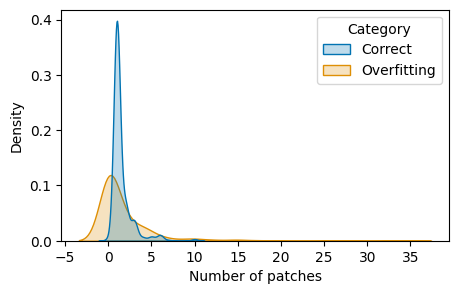

In [208]:
plot_density_graph(small_df_, len(small_df_))

**Since there is an uneven distribution of data in the dataset. We need to fix the balance or use different kinds of training**

### Data Preprocessing

1. Remove the filename prefix from the small_dataset

In [211]:
def remove_filename_prefix(patch):
    if isinstance(patch, str):
        new_patch = " ".join(patch.split(" ")[1:])
        return new_patch
    else:
        return patch

In [213]:
small_patches_df['buggy'] = small_patches_df['buggy'].apply(remove_filename_prefix)
small_patches_df['patch'] = small_patches_df['patch'].apply(remove_filename_prefix)

In [215]:
small_patches_df.iloc[0]['buggy']

'* @version $Revision$ $Date$ public final class MathUtils { public static final double EPSILON = 0x1.0p-53; if (n < 0) { throw new IllegalArgumentException("must have n >= 0 for n!"); } return Math.floor(Math.exp(factorialLog(n)) + 0.5); } '

In [145]:
# Removing where correct is zero
correct_labels_to_remove = tofI_dataset.loc[tofI_dataset["correct"] == 0].index.get_level_values('dataset').tolist()

In [146]:
overfitting_labels_to_remove =  tofI_dataset.loc[tofI_dataset["overfitting"] == 0].index.get_level_values('dataset').tolist()

In [148]:
len(overfitting_labels_to_remove)

190

# Implementation on the large_patches dataset

In [181]:
f"Unique number of bugs in large patches dataset: {len(large_patches_df['dataset'].unique())}"

'Unique number of bugs in large patches dataset: 855'

In [154]:
df_contingency = pd.crosstab(large_patches_df["dataset"], large_patches_df["label"])

In [179]:
len(df_contingency.loc[(df_contingency["overfitting"] > 0) & (df_contingency["correct"] > 0)])

15

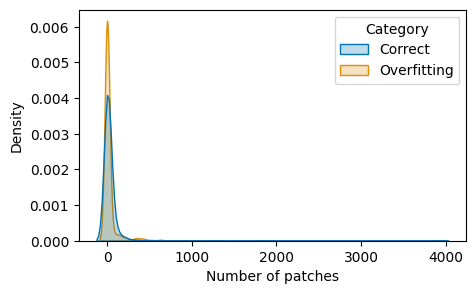

In [165]:
plot_density_graph(df_contingency, len(df_contingency))

In [157]:
df_contingency.loc[df_contingency['correct'] == 0]

label,correct,overfitting
dataset,,
Bears-100,0,141
Bears-101,0,135
Bears-104,0,110
Bears-121,0,20
Bears-126,0,54
...,...,...
QuixBugs-DEPTH_FIRST_SEARCH-,0,42
QuixBugs-HANOI-,0,1
QuixBugs-LIS-,0,115


In [143]:
tofI_dataset.index.get_level_values('dataset').tolist()

['Defects4J-Chart-1',
 'Defects4J-Chart-10',
 'Defects4J-Chart-11',
 'Defects4J-Chart-12',
 'Defects4J-Chart-13',
 'Defects4J-Chart-14',
 'Defects4J-Chart-15',
 'Defects4J-Chart-16',
 'Defects4J-Chart-17',
 'Defects4J-Chart-18',
 'Defects4J-Chart-19',
 'Defects4J-Chart-2',
 'Defects4J-Chart-20',
 'Defects4J-Chart-21',
 'Defects4J-Chart-22',
 'Defects4J-Chart-23',
 'Defects4J-Chart-24',
 'Defects4J-Chart-25',
 'Defects4J-Chart-26',
 'Defects4J-Chart-3',
 'Defects4J-Chart-4',
 'Defects4J-Chart-5',
 'Defects4J-Chart-6',
 'Defects4J-Chart-7',
 'Defects4J-Chart-8',
 'Defects4J-Chart-9',
 'Defects4J-Closure-1',
 'Defects4J-Closure-10',
 'Defects4J-Closure-100',
 'Defects4J-Closure-101',
 'Defects4J-Closure-102',
 'Defects4J-Closure-103',
 'Defects4J-Closure-104',
 'Defects4J-Closure-105',
 'Defects4J-Closure-106',
 'Defects4J-Closure-107',
 'Defects4J-Closure-108',
 'Defects4J-Closure-109',
 'Defects4J-Closure-11',
 'Defects4J-Closure-110',
 'Defects4J-Closure-111',
 'Defects4J-Closure-112',

In [139]:
tofI_dataset.keys()

Index(['correct', 'overfitting'], dtype='object', name='label')

In [76]:
df = tofI_dataset[['correct', 'overfitting']]

In [77]:
arr = df.to_numpy()

In [79]:
from statsmodels.stats.contingency_tables import mcnemar

result = mcnemar(arr, exact=True)

result.statistic, result.pvalue

(1.0, 0.0009765625)

In [25]:
large_patches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dataset  49694 non-null  object
 1   tool     49694 non-null  object
 2   buggy    49694 non-null  object
 3   patch    49694 non-null  object
 4   label    49694 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [26]:
small_patches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dataset  1183 non-null   object
 1   tool     1183 non-null   object
 2   buggy    1183 non-null   object
 3   patch    1183 non-null   object
 4   label    1183 non-null   object
dtypes: object(5)
memory usage: 46.3+ KB


In [27]:

len(large_patches_df["dataset"].unique())

855

In [19]:
large_patches_df["dataset"].unique()

array(['Bugs.jar-math-45', 'Defects4J-Chart-5', 'Defects4J-Math-8',
       'Bears-139', 'Defects4J-Closure-10', 'Bugs.jar-math-24',
       'Defects4J-Closure-13', 'QuixBugs-DEPTH_FIRST_SEARCH-',
       'Bugs.jar-math-33', 'Bugs.jar-math-28', 'Defects4J-Math-20',
       'Bears-126', 'Defects4J-Chart-1', 'Defects4J-Closure-21',
       'Defects4J-Closure-67', 'Defects4J-Lang-7', 'Defects4J-Math-50',
       'Defects4J-Closure-130', 'Defects4J-Closure-59',
       'Defects4J-Math-22', 'Defects4J-Math-31', 'Defects4J-Math-95',
       'Defects4J-Closure-118', 'Bugs.jar-math-105', 'Defects4J-Math-49',
       'Defects4J-Closure-55', 'Defects4J-Closure-22', 'Defects4J-Math-2',
       'Defects4J-Closure-46', 'Defects4J-Math-40',
       'Defects4J-Closure-124', 'Defects4J-Closure-112',
       'Defects4J-Closure-127', 'Defects4J-Closure-117',
       'Defects4J-Math-28', 'Defects4J-Closure-115', 'Defects4J-Math-85',
       'Defects4J-Closure-75', 'Defects4J-Chart-12',
       'Defects4J-Closure-129', 

In [ ]:
len(small_patches_df["tool"].unique())

29